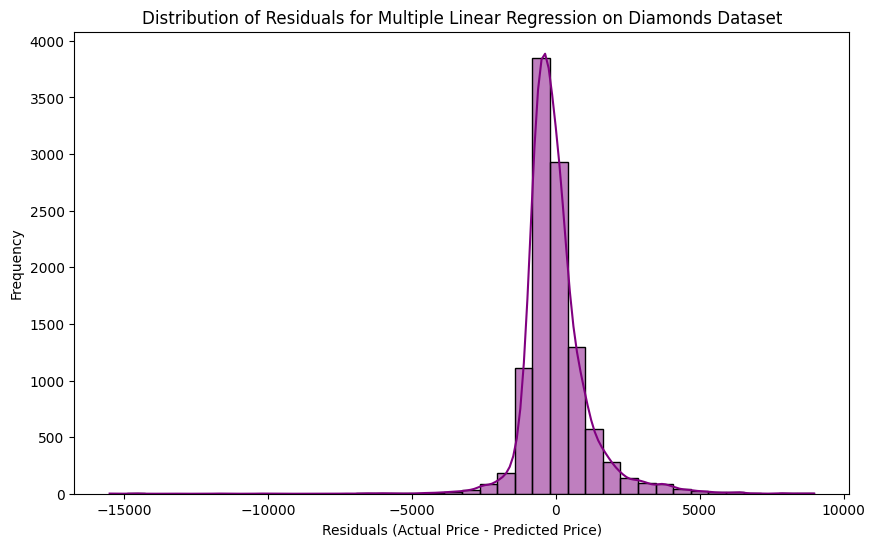

In [2]:
#1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression modelusing Seaborn's "diamonds" dataset.



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Load diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Select features and target
X = diamonds.drop(columns=['price'])
y = diamonds['price']

# Preprocessing: Handle categorical variables using OneHotEncoding
categorical_features = ['cut', 'color', 'clarity']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Define preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
], remainder='passthrough')

# Build the pipeline with preprocessing and Linear Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, color='purple', bins=40)
plt.title('Distribution of Residuals for Multiple Linear Regression on Diamonds Dataset')
plt.xlabel('Residuals (Actual Price - Predicted Price)')
plt.ylabel('Frequency')
plt.show()


In [3]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and RootMean Squared Error (RMSE) for a linear regression model.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate some random data
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the values
y_pred = model.predict(X_test)

# Calculate the errors
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the errors
print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)

MSE:  0.9955721925385029
MAE:  0.756847042558661
RMSE:  0.9977836401437452


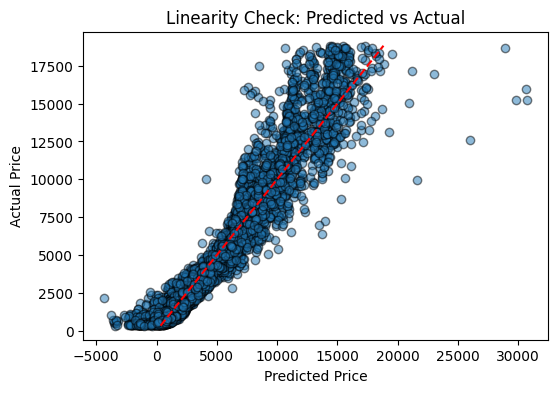

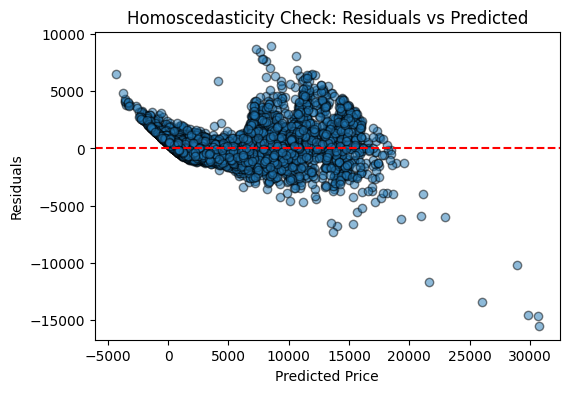

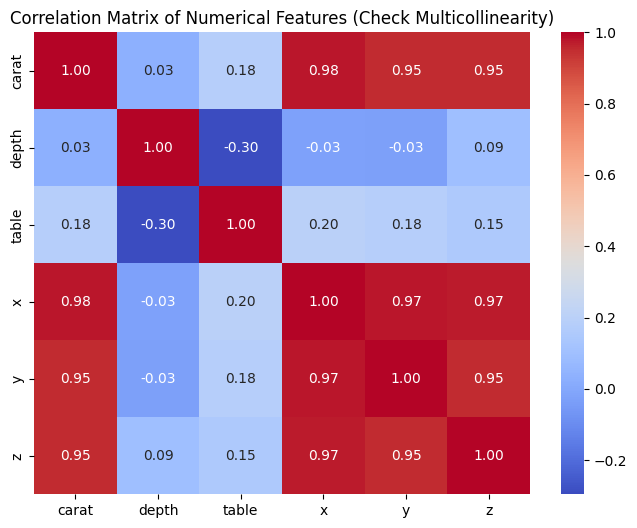

In [5]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to checklinearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Prepare features and target
X = diamonds.drop(columns=['price'])
y = diamonds['price']

# Identify categorical and numerical columns
categorical_features = ['cut', 'color', 'clarity']
numerical_features = X.drop(columns=categorical_features).columns.tolist()

# Preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), categorical_features),
], remainder='passthrough')

# Full modeling pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# 1. Linearity: Scatter plot of predicted vs actual prices
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, y_test, alpha=0.5, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linearity Check: Predicted vs Actual')
plt.show()

# 2. Homoscedasticity: Residuals vs predicted values plot
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5, edgecolor='k')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check: Residuals vs Predicted')
plt.show()

# 3. Multicollinearity: Correlation matrix heatmap of numerical features
plt.figure(figsize=(8, 6))
corr = diamonds[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features (Check Multicollinearity)')
plt.show()


In [8]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates theperformance of different regression models


import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Boston housing dataset from openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
X = boston.data
y = boston.target.astype(float)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define regression models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        'Model': name,
        'MSE': mse,
        'R²': r2
    })

results_df = pd.DataFrame(results).sort_values(by='R²', ascending=False)
print(results_df)




               Model        MSE        R²
4      Random Forest   7.912745  0.892100
3      Decision Tree  10.416078  0.857963
0  Linear Regression  24.291119  0.668759
1   Ridge Regression  24.312904  0.668462
2   Lasso Regression  25.656739  0.650138


In [9]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, andR-squared score.

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Print the R-squared score
print('R-squared score:', model.score(X_test, y_test))

Coefficients: [[1.9805182]]
Intercept: [3.20634019]
R-squared score: 0.1354996889186385


R-squared score: 0.5449381659234663


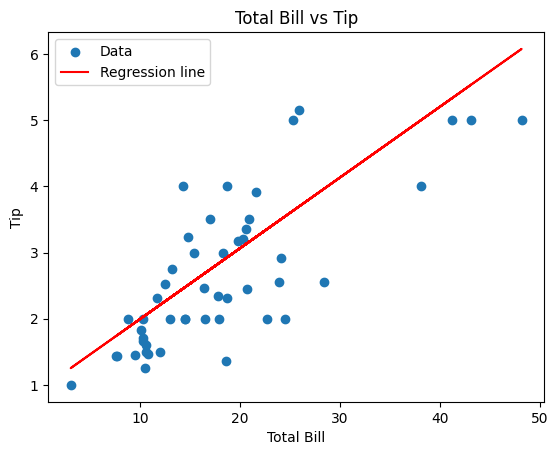

In [10]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset usingsimple linear regression and visualizes the results.

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Load the tips dataset
tips = sns.load_dataset('tips')

# Define the features and target
X = tips[['total_bill']]
y = tips['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2 = model.score(X_test, y_test)

# Print the R-squared score
print('R-squared score:', r2)

# Visualize the results
plt.scatter(X_test, y_test, label='Data')
plt.plot(X_test, y_pred, label='Regression line', color='red')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.show()

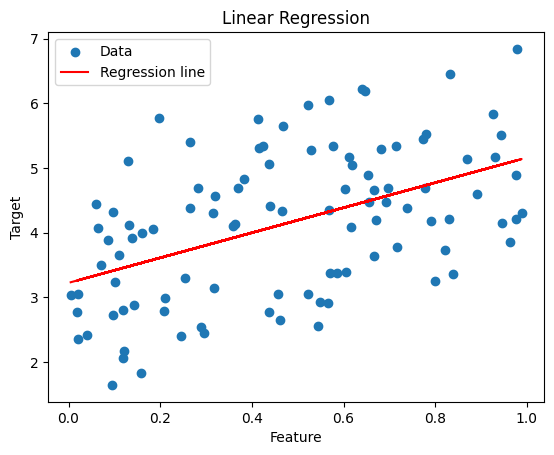

In [11]:

#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the
#model to predict new values and plot the data points along with the regression line.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, label='Regression line', color='red')
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

In [12]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file



import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Pickle the model to a file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Load the pickled model
with open('model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Print the loaded model's coefficients and intercept
print('Coefficients:', loaded_model.coef_)
print('Intercept:', loaded_model.intercept_)

Coefficients: [[1.93693502]]
Intercept: [3.22215108]


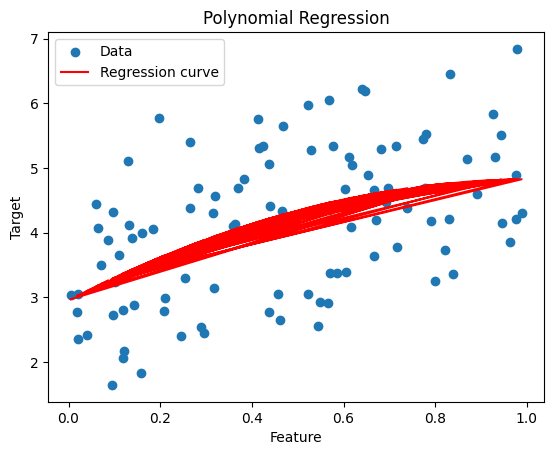

In [13]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the
#regression curve.





import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate a synthetic dataset
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Create a polynomial feature transformer
poly_features = PolynomialFeatures(degree=2)

# Fit the transformer to the data
poly_features.fit(X)

# Transform the data
X_poly = poly_features.transform(X)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Visualize the results
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, label='Regression curve', color='red')
plt.title('Polynomial Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

Coefficient: [[1.93693502]]
Intercept: [3.22215108]


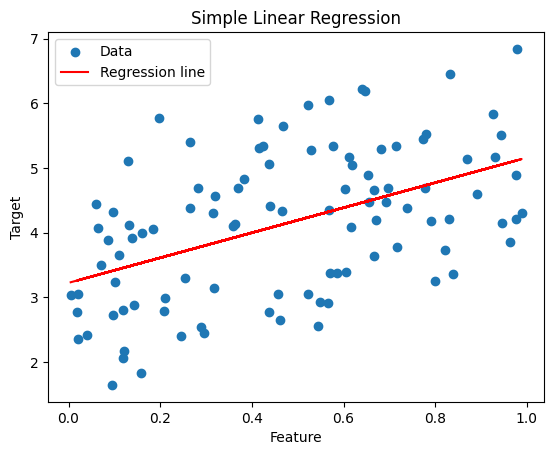

In [14]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear
#regression model to the data. Print the model's coefficient and intercept.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Print the model's coefficient and intercept
print('Coefficient:', model.coef_)
print('Intercept:', model.intercept_)

# Visualize the results
plt.scatter(X, y, label='Data')
plt.plot(X, model.predict(X), label='Regression line', color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()

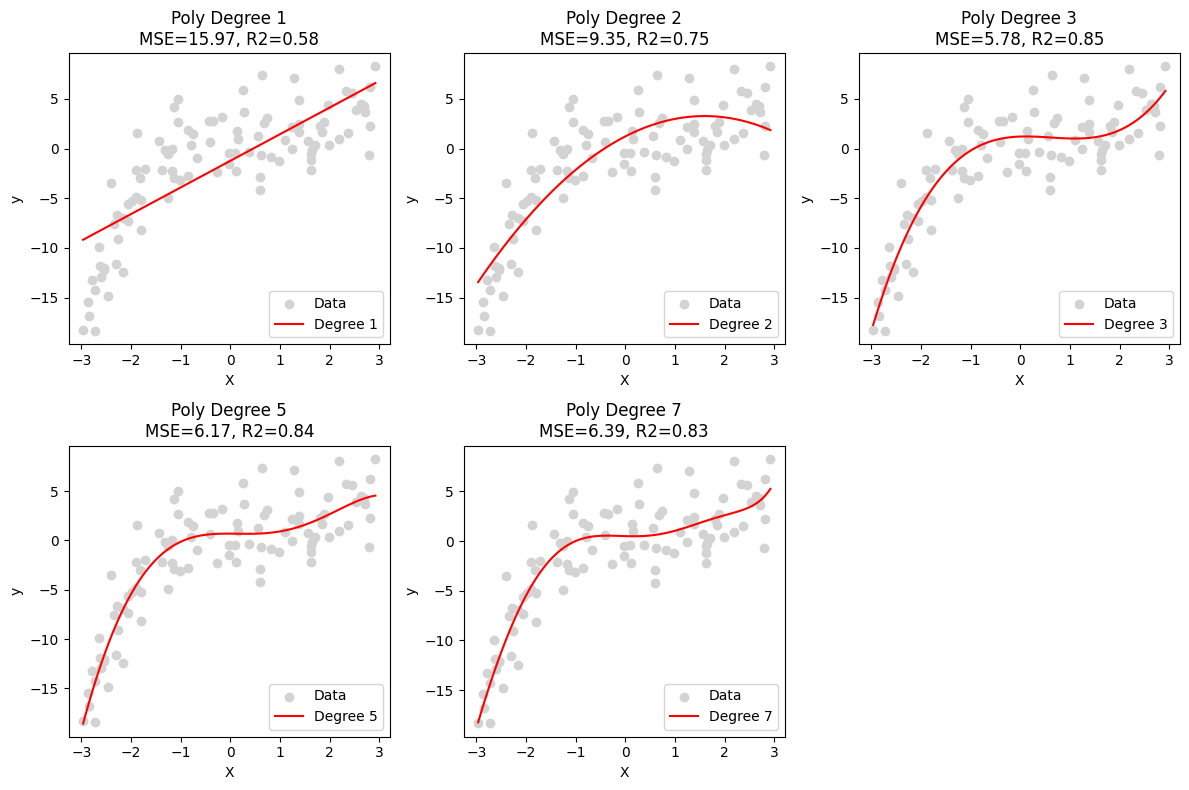

   Degree        MSE        R2
0       1  15.974909  0.580850
1       2   9.347550  0.754739
2       3   5.778444  0.848385
3       5   6.173430  0.838021
4       7   6.388560  0.832377


In [16]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset andcompares their performance.


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Create synthetic dataset (non-linear)
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3  # Values between -3 and 3
y = 0.5 * X**3 - X**2 + 2 + np.random.randn(100, 1) * 3  # Cubic relation with noise

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1, 2, 3, 5, 7]  # Polynomial degrees to try

plt.figure(figsize=(12, 8))

results = []

X_plot = np.linspace(X.min(), X.max(), 100).reshape(100, 1)  # For plotting smooth curves

for i, degree in enumerate(degrees, 1):
    # Create pipeline: Polynomial features + Linear regression
    model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear_regression', LinearRegression())
    ])
    
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    y_plot = model.predict(X_plot)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append({'Degree': degree, 'MSE': mse, 'R2': r2})
    
    # Plot
    plt.subplot(2, 3, i)
    plt.scatter(X, y, color='lightgray', label='Data')
    plt.plot(X_plot, y_plot, color='red', label=f'Degree {degree}')
    plt.title(f'Poly Degree {degree}\nMSE={mse:.2f}, R2={r2:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()

# Print performance summary
import pandas as pd
print(pd.DataFrame(results).sort_values('Degree'))


Coefficients:  [[1.81317159 4.27555414]]
Intercept:  [3.04214256]
R-squared score:  0.6514384553032369


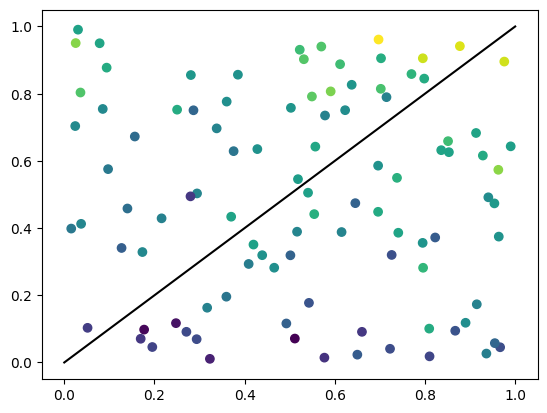

In [17]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model'scoefficients, intercept, and R-squared score.



import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with two features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100, 1)

# Fit a simple linear regression model to the dataset
model = LinearRegression()
model.fit(np.hstack((X1, X2)), y)

# Print the model's coefficients, intercept, and R-squared score
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print("R-squared score: ", model.score(np.hstack((X1, X2)), y))

# Visualize the data points and regression plane
plt.scatter(X1, X2, c=y)
plt.plot(np.linspace(0, 1, 100), np.linspace(0, 1, 100), 'k-')
plt.show()

Coefficients:  [[1.59946152]]
Intercept:  [3.08512735]


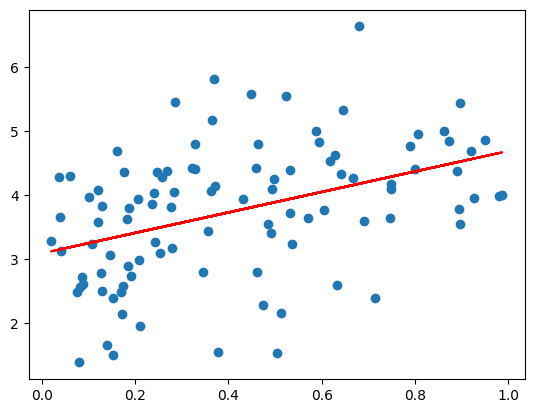

In [18]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes theregression line along with the data points.


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Visualize the data points and regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

In [23]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a datasetwith multiple features.

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load example dataset (diamonds)
df = sns.load_dataset('diamonds')

# Drop target variable (if any) or columns you don't want in VIF calculation
X = df.drop(columns=['price'])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical variables
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = pd.DataFrame(
    ohe.fit_transform(X[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X.index
)

# Combine numerical and encoded categorical features
X_processed = pd.concat([X[numerical_cols], X_cat_encoded], axis=1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X_processed.columns
vif_data['VIF'] = [variance_inflation_factor(X_processed.values, i) for i in range(X_processed.shape[1])]

# Sort by VIF descending
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)



          feature          VIF
3               x  1366.837897
1           depth   646.980861
2           table   641.680011
5               z   564.591584
4               y   536.992970
0           carat    76.512677
17    clarity_SI1    19.272989
20    clarity_VS2    18.217142
7       cut_Ideal    15.137009
18    clarity_SI2    13.663053
19    clarity_VS1    12.512140
8     cut_Premium     9.938922
9   cut_Very Good     8.739739
22   clarity_VVS2     8.207490
21   clarity_VVS1     6.254841
6        cut_Good     4.119430
16     clarity_IF     3.583189
12        color_G     2.774935
10        color_E     2.454458
11        color_F     2.444966
13        color_H     2.306806
14        color_I     1.901262
15        color_J     1.501256


Coefficients:  [[0.         2.02112031 4.00357602 4.99938059 5.99999763]]
Intercept:  [2.86244841]


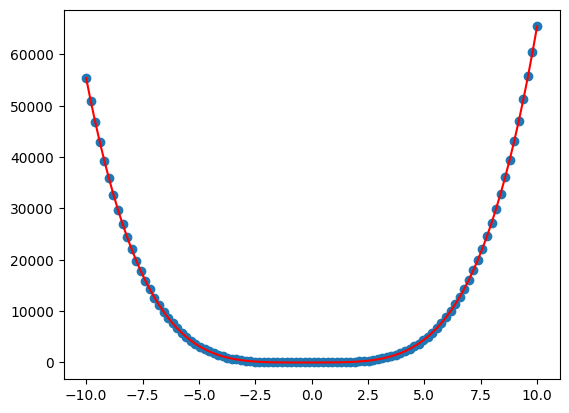

In [22]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a
#polynomial regression model, and plots the regression curve.


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with a polynomial relationship of degree 4
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 3 + 2 * X + 4 * X**2 + 5 * X**3 + 6 * X**4 + np.random.randn(100, 1)

# Fit a polynomial regression model to the dataset
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Visualize the data points and regression curve
plt.scatter(X, y)
plt.plot(X, model.predict(poly_features.fit_transform(X)), color='red')
plt.show()

In [24]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple
#linear regression model, and prints the R-squared score.

# Import necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Create a synthetic dataset with multiple features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100, 1)

# Create a machine learning pipeline with data standardization and a linear regression model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])

# Fit the pipeline to the dataset
pipeline.fit(np.hstack((X1, X2)), y)

# Print the model's coefficients and intercept
print("Coefficients: ", pipeline['model'].coef_)
print("Intercept: ", pipeline['model'].intercept_)

# Print the R-squared score
print("R-squared score: ", pipeline['model'].score(np.hstack((X1, X2)), y))

Coefficients:  [[0.67845079 1.21659842]]
Intercept:  [6.33102973]
R-squared score:  0.039184970669144725


Coefficients:  [[0.         2.05655399 3.99414932 4.99927954]]
Intercept:  [3.28428985]


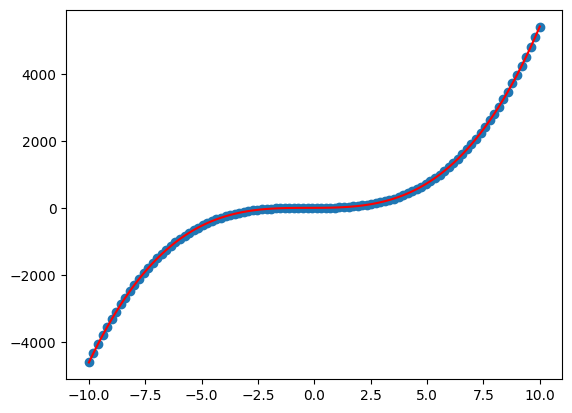

In [25]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.


# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with a polynomial relationship of degree 3
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 3 + 2 * X + 4 * X**2 + 5 * X**3 + np.random.randn(100, 1)

# Fit a polynomial regression model to the dataset
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Visualize the data points and regression curve
plt.scatter(X, y)
plt.plot(X, model.predict(poly_features.fit_transform(X)), color='red')
plt.show()

In [26]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print
#the R-squared score and model coefficients.



# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with 5 features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
X3 = np.random.rand(100, 1)
X4 = np.random.rand(100, 1)
X5 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + 5 * X3 + 6 * X4 + 7 * X5 + np.random.randn(100, 1)

# Fit a multiple linear regression model to the dataset
model = LinearRegression()
model.fit(np.hstack((X1, X2, X3, X4, X5)), y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Print the R-squared score
print("R-squared score: ", model.score(np.hstack((X1, X2, X3, X4, X5)), y))




Coefficients:  [[2.1977042  3.93574168 5.14460141 6.32902251 7.06982598]]
Intercept:  [2.75388077]
R-squared score:  0.9213199575057546


Coefficients:  [[2.10043469]]
Intercept:  [3.13542081]


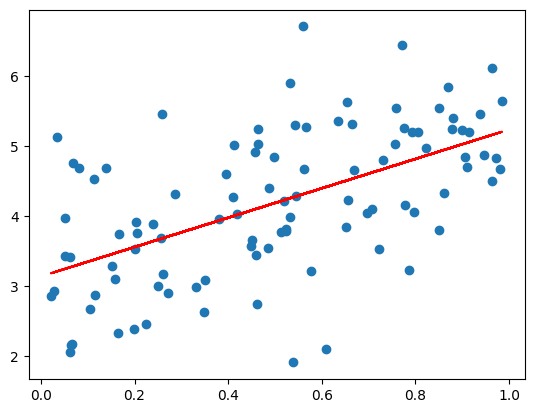

In [27]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the
#data points along with the regression line.



# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data for a linear relationship
X = np.random.rand(100, 1)
y = 3 + 2 * X + np.random.randn(100, 1)

# Fit a linear regression model to the data
model = LinearRegression()
model.fit(X, y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Visualize the data points and regression line
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.show()

In [28]:
#20.Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.


# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset with 3 features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
X3 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + 5 * X3 + np.random.randn(100, 1)

# Fit a multiple linear regression model to the dataset
model = LinearRegression()
model.fit(np.hstack((X1, X2, X3)), y)

# Print the model's coefficients and intercept
print("Coefficients: ", model.coef_)
print("Intercept: ", model.intercept_)

# Print the R-squared score
print("R-squared score: ", model.score(np.hstack((X1, X2, X3)), y))

Coefficients:  [[2.43359197 4.2646842  5.28998334]]
Intercept:  [2.51329908]
R-squared score:  0.8319231932483613


In [29]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using
#joblib instead of pickling.

# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import joblib

# Create a synthetic dataset with multiple features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100, 1)

# Fit a linear regression model to the dataset
model = LinearRegression()
model.fit(np.hstack((X1, X2)), y)

# Serialize the model using joblib
joblib.dump(model, 'model.joblib')

# Deserialize the model using joblib
loaded_model = joblib.load('model.joblib')

# Print the model's coefficients and intercept
print("Coefficients: ", loaded_model.coef_)
print("Intercept: ", loaded_model.intercept_)


Coefficients:  [[1.7889717  3.98933048]]
Intercept:  [3.19399628]


In [31]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use
#the Seaborn 'tips' dataset.

import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load tips dataset
tips = sns.load_dataset('tips')

# Target variable
y = tips['tip']

# Features: Drop target and optionally other unwanted columns
X = tips.drop(columns=['tip'])

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

# One-hot encode categorical features
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = pd.DataFrame(
    ohe.fit_transform(X[categorical_cols]),
    columns=ohe.get_feature_names_out(categorical_cols),
    index=X.index
)

# Combine numerical and encoded categorical features
X_processed = pd.concat([X[numerical_cols], X_cat_encoded], axis=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Optional: Display coefficients with feature names
coefficients = pd.Series(model.coef_, index=X_processed.columns)
print("\nModel Coefficients:")
print(coefficients)




Mean Squared Error (MSE): 0.7034
R-squared (R²) Score: 0.4373

Model Coefficients:
total_bill    0.094700
size          0.233484
sex_Male      0.028819
smoker_Yes   -0.192353
day_Sat      -0.185785
day_Sun      -0.050793
day_Thur     -0.179721
time_Lunch    0.094957
dtype: float64


In [32]:
#23.Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with multiple features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(np.hstack((X1, X2)), y, test_size=0.2, random_state=42)

# Fit a linear regression model to the dataset
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Fit a ridge regression model to the dataset
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train, y_train)

# Print the coefficients and R-squared score for each model
print("Linear Regression Coefficients: ", model_lr.coef_)
print("Linear Regression Intercept: ", model_lr.intercept_)
print("Linear Regression R-squared score: ", model_lr.score(X_test, y_test))
print("Ridge Regression Coefficients: ", model_ridge.coef_)
print("Ridge Regression Intercept: ", model_ridge.intercept_)
print("Ridge Regression R-squared score: ", model_ridge.score(X_test, y_test))

Linear Regression Coefficients:  [[2.54853861 4.05022957]]
Linear Regression Intercept:  [2.76535915]
Linear Regression R-squared score:  0.7633439395884787
Ridge Regression Coefficients:  [2.5101274  3.99161815]
Ridge Regression Intercept:  [2.81239068]
Ridge Regression R-squared score:  0.7599787843996201


In [33]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.


# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a synthetic dataset with multiple features and a linear relationship between them
X1 = np.random.rand(100, 1)
X2 = np.random.rand(100, 1)
y = 3 + 2 * X1 + 4 * X2 + np.random.randn(100, 1)

# Fit a linear regression model to the dataset
model = LinearRegression()
scores = cross_val_score(model, np.hstack((X1, X2)), y, cv=5)

# Print the cross-validation scores
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", np.mean(scores))

Cross-validation scores:  [0.75439962 0.50051057 0.5734621  0.58627161 0.79610899]
Average cross-validation score:  0.6421505792835849


In [34]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.


# Import necessary libraries
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a synthetic dataset with a polynomial relationship of degree 4
X = np.linspace(-10, 10, 100).reshape(-1, 1)
y = 3 + 2 * X + 4 * X**2 + 5 * X**3 + 6 * X**4 + np.random.randn(100, 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit polynomial regression models of different degrees to the dataset
degrees = [1, 2, 3, 4]
scores = []
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)
    scores.append(model.score(poly_features.fit_transform(X_test), y_test))

# Print the R-squared scores for each model
print("R-squared scores: ", scores)
print("Best degree: ", degrees[np.argmax(scores)])

R-squared scores:  [-0.10532973097266041, 0.8855597256004001, 0.8812456509348315, 0.9999999963500845]
Best degree:  4
